In [1]:
#Importar todos los modulos necesarios para el analisis
import pandas 
import os
import pipeline_functions
from importlib import reload # reload 
reload(pipeline_functions)

<module 'pipeline_functions' from 'C:\\Users\\Mercedes_IIB-UNSAM\\Desktop\\2021\\pipeline_functions.py'>

In [2]:
#Variables a asignar por el usuario
path = r'C:\Users\Mercedes_IIB-UNSAM\Desktop\2021'
in_file = 'gene_drug_interaction'

In [3]:
#Importo el set de datos
os.chdir(path)
gdi = pandas.read_csv(in_file,sep='\t')

#Datos para genes
filtro_genes_1 = pipeline_functions.leer_tabla_columnas("yeast.genes.list",'\t',['species_code', 'gene_name', 'omcl'])
filtro_genes_2 = pipeline_functions.leer_tabla_columnas("tryp.genes.list",'\t',['species_code', 'gene_name', 'omcl'])
filtro_genes_3 = pipeline_functions.leer_tabla_columnas('tbr.essentialOrthologs.list',',')
                                     
#Datos para compuestos
gdi_inchikey = pipeline_functions.smiles_to_inchikey(gdi,'smiles')                               
filtro_compuestos_1 = pipeline_functions.leer_tabla_columnas('tested_drugs_inchikey.csv',',')
filtro_compuestos_2 = pipeline_functions.leer_tabla_columnas('drug_availability_inchikey.csv',',')

#filtro_SEC14 = pipeline_functions.leer_tabla_columnas('GDI_SEC14.tsv','')

gdi_inchikey = gdi_inchikey[['orf','inchiKey']]

# Filtrado de los genes

In [4]:
resultado_filtro_genes_1 = pipeline_functions.interseccion_datos(gdi_inchikey,filtro_genes_1,'orf','gene_name',"OMCL in Yeast",'orf')
resultado_genes_1 = resultado_filtro_genes_1[0]
resultado_genes_1 = resultado_genes_1[['gene_name','omcl','inchiKey']]
resultado_genes_1 = resultado_genes_1.drop_duplicates()
resultado_genes_1 = resultado_genes_1.dropna()

In [5]:
resultado_filtro_genes_2 = pipeline_functions.interseccion_datos(resultado_genes_1 ,filtro_genes_2,'omcl','omcl',"OMCL in Tryps", "omcl")
resultado_genes_2 = resultado_filtro_genes_2[0]
resultado_genes_2 = resultado_genes_2[['gene_name_y','omcl','inchiKey']]
resultado_genes_2 = resultado_genes_2.drop_duplicates()
resultado_genes_2 = resultado_genes_2.dropna()

In [6]:
resultado_filtro_genes_3 = pipeline_functions.interseccion_datos(resultado_genes_2,filtro_genes_3,'omcl','omcl',"Essentiality", "omcl")
resultado_genes_3 = resultado_filtro_genes_2[0]

In [7]:
#Cuento los genes para seleccionar según promiscuidad
umbral=200
genes_count = resultado_filtro_genes_3[0].groupby('gene_name_y').nunique()
genes_count = genes_count.sort_values(by=['inchiKey'])
genes_count = genes_count[genes_count['inchiKey']<umbral]
genes_count = genes_count.unstack(level=-1).reset_index().drop('level_0', axis=1)
genes_count = genes_count.drop_duplicates()
gene_selection = pandas.merge(left=gdi_inchikey,right=genes_count,how="inner",left_on=['orf'], right_on=['gene_name_y'])
gene_selection = gene_selection[['orf','inchiKey']]

In [8]:
genes_count

,gene_name_y,0
0,YDR424C,1
1,YPL217C,1
2,YGR037C,1
3,YDR447C,1
4,YKL172W,1
...,...,...
1987,YKL203C,181
1988,YPL273W,190
1989,YOR265W,197
1990,YPL240C,198


In [9]:
not_selected_genes = pandas.concat([resultado_filtro_genes_1[1], resultado_filtro_genes_2[1], resultado_filtro_genes_3[1]], ignore_index=False)

# Análisis de los filtros de genes

In [10]:
resultados_1 = pipeline_functions.interseccion_datos(gdi_inchikey,resultado_genes_1,'orf','gene_name','Merged data','orf')

In [11]:
resultados_1 = resultados_1[0]
resultados_1 = resultados_1[['gene_name','omcl','inchiKey_y']]
resultados_1 = resultados_1.drop_duplicates()
resultados_1 = resultados_1.dropna()

In [12]:
resultados_1
print(len(resultados_1['gene_name'].unique()))
print(len(resultados_1['inchiKey_y'].unique()))

5008
2761


In [13]:
resultados_2 = pipeline_functions.interseccion_datos(gdi_inchikey,resultado_genes_2,'orf','gene_name_y','Merged data','orf')

In [14]:
resultados_2

(         gene_name_y        omcl                   inchiKey_x      orf  \
 0            YGL084C  OG5_128109  GHASVSINZRGABV-UHFFFAOYSA-N  YGL084C   
 1            YGL084C  OG5_128109  GHASVSINZRGABV-UHFFFAOYSA-N  YGL084C   
 2            YGL084C  OG5_128109  GHASVSINZRGABV-UHFFFAOYSA-N  YGL084C   
 3            YGL084C  OG5_128109  GHASVSINZRGABV-UHFFFAOYSA-N  YGL084C   
 4            YGL084C  OG5_128109  GHASVSINZRGABV-UHFFFAOYSA-N  YGL084C   
 ...              ...         ...                          ...      ...   
 12538039     YPR058W  OG5_129197  JUVIOZPCNVVQFO-NDXORKPFSA-N  YPR058W   
 12538040     YPR058W  OG5_129197  JUVIOZPCNVVQFO-NDXORKPFSA-N  YPR058W   
 12538041     YPR058W  OG5_129197  JUVIOZPCNVVQFO-NDXORKPFSA-N  YPR058W   
 12538042     YPR058W  OG5_129197  JUVIOZPCNVVQFO-NDXORKPFSA-N  YPR058W   
 12538043     YPR058W  OG5_129197  JUVIOZPCNVVQFO-NDXORKPFSA-N  YPR058W   
 
                            inchiKey_y  
 0         GHASVSINZRGABV-UHFFFAOYSA-N  
 1         XUKUU

In [15]:
resultados_2 = resultados_2[0]
resultados_2 = resultados_2[['gene_name_y','omcl','inchiKey_y']]
resultados_2 = resultados_2.drop_duplicates()
resultados_2 = resultados_2.dropna()

In [16]:
resultados_2
print(len(resultados_2['gene_name_y'].unique()))
print(len(resultados_2['inchiKey_y'].unique()))

1780
2405


In [17]:
resultados_3 = pipeline_functions.interseccion_datos(gdi_inchikey,resultado_genes_3,'orf','gene_name_y','Merged data','orf')

In [18]:
resultados_3 = resultados_3[0]
resultados_3 = resultados_3[['gene_name_y','omcl','inchiKey_y']]
resultados_3 = resultados_3.drop_duplicates()
resultados_3 = resultados_3.dropna()

In [19]:
resultados_3
print(len(resultados_3['gene_name_y'].unique()))
print(len(resultados_3['inchiKey_y'].unique()))

1780
2405


In [20]:
resultados_4 = pipeline_functions.interseccion_datos(gdi_inchikey,gene_selection,'orf','orf','Merged data','orf')

In [21]:
resultados_4 = resultados_4[0]
resultados_4 = resultados_4[['orf','inchiKey_y']]
resultados_4 = resultados_4.drop_duplicates()
resultados_4 = resultados_4.dropna()

In [22]:
print(len(resultados_4))
print(len(resultados_4['orf'].unique()))
print(len(resultados_4['inchiKey_y'].unique()))

39631
996
1326


In [23]:
resultados_4

,orf,inchiKey_y
0,YOR317W,FBOZXECLQNJBKD-UHFFFAOYSA-N
1,YOR317W,XRECTZIEBJDKEO-UHFFFAOYSA-N
2,YOR317W,XTPOJZQDRYWGAK-UHFFFAOYSA-P
4,YOR317W,ZPFXAOWNKLFJDN-UHFFFAOYSA-N
5,YOR317W,RYHCACJBKCOBTJ-UHFFFAOYSA-N
...,...,...
7755568,YNL067W,FNPHNLNTJNMAEE-UHFFFAOYSA-O
7755569,YNL067W,CWJSHJJYOPWUGX-UHFFFAOYSA-N
7755570,YNL067W,IZUPBVBPLAPZRR-UHFFFAOYSA-N
7755571,YNL067W,VHKXXVVRRDYCIK-UHFFFAOYSA-N


In [24]:
results = pandas.read_csv('missing_list.csv')
filtro_genes_1 = pandas.read_csv("yeast.genes.list",sep='\t')
filtro_genes_2 = pandas.read_csv("tryp.genes.list",sep='\t')
filtro_genes_3 = pipeline_functions.leer_tabla_columnas('tbr.essentialOrthologs.list',',')             

In [25]:
df1 = pandas.merge(results, filtro_genes_1,'inner', left_on='orf',right_on='gene_name')
df2 = pandas.merge(df1, filtro_genes_2,'inner', left_on='omcl_x',right_on='omcl')
df3a = df2.loc[(df2['species_code_y'] == 'tcr')]
df3b = df2.loc[(df2['species_code_y'] == 'tcr.dm28')]
df3 = pandas.concat([df3a,df3b],sort = False)
df3.to_csv('genes_info.csv')

# Filtrado de los compuestos

In [26]:
resultado_filtro_compuestos_1 = pipeline_functions.interseccion_datos(gdi_inchikey,filtro_compuestos_2,'inchiKey','inchikey','Disponibilidad comercial','inchiKey')
resultado_compuestos_1 = resultado_filtro_compuestos_1[0]
resultado_compuestos_1 = resultado_compuestos_1[['orf','inchiKey','smiles']]
resultado_compuestos_1 = resultado_compuestos_1.drop_duplicates()
resultado_compuestos_1 = resultado_compuestos_1.dropna()

In [27]:
resultado_filtro_compuestos_2 = pipeline_functions.drug_likness(resultado_compuestos_1,'smiles')
resultado_compuestos_2 = resultado_filtro_compuestos_2[0]
resultado_compuestos_2 = resultado_compuestos_2[['orf','inchiKey','smiles']]
resultado_compuestos_2 = resultado_compuestos_2.drop_duplicates()
resultado_compuestos_2 = resultado_compuestos_2.dropna()

In [28]:
#Cuento las drogas para seleccionar según promiscuidad
umbral=20
drug_count = resultado_filtro_compuestos_2[0].groupby('inchiKey').nunique()
drug_count = drug_count.sort_values(by=['orf'])
drug_count = drug_count[drug_count['orf']<umbral]
drug_count = drug_count.unstack(level=-1).reset_index().drop('level_0', axis=1)
drug_count = drug_count.drop_duplicates()

drug_selection = pandas.merge(left=gdi_inchikey,right=drug_count,how="inner",left_on=['inchiKey'], right_on=['inchiKey'])

In [29]:
not_selected_compounds = pandas.concat([resultado_filtro_compuestos_1[1], resultado_filtro_compuestos_2[1]], ignore_index=False)

# Análisis de los filtros de compuestos

In [30]:
resultados_1 = pipeline_functions.interseccion_datos(gdi_inchikey,resultado_compuestos_1,'inchiKey','inchiKey','Merged data','inchiKey')

In [31]:
resultados_1 = resultados_1[0]
resultados_1 = resultados_1[['orf_y','inchiKey']]
resultados_1 = resultados_1.drop_duplicates()
resultados_1 = resultados_1.dropna()

In [32]:
resultados_1
print(len(resultados_1['orf_y'].unique()))
print(len(resultados_1['inchiKey'].unique()))

5220
1195


In [33]:
resultados_2 = pipeline_functions.interseccion_datos(gdi_inchikey,resultado_compuestos_2,'inchiKey','inchiKey','Merged data','inchiKey')

In [34]:
resultados_2 = resultados_2[0]
resultados_2 = resultados_2[['orf_y','inchiKey']]
resultados_2 = resultados_2.drop_duplicates()
resultados_2 = resultados_2.dropna()

In [35]:
resultados_2
print(len(resultados_2['orf_y'].unique()))
print(len(resultados_2['inchiKey'].unique()))

5115
1126


In [36]:
resultados_3 = pipeline_functions.interseccion_datos(gdi_inchikey,drug_selection,'inchiKey','inchiKey','Merged data','inchiKey')

In [37]:
resultados_3 = resultados_3[0]
resultados_3 = resultados_3[['orf_y','inchiKey']]
resultados_3 = resultados_3.drop_duplicates()
resultados_3 = resultados_3.dropna()

In [38]:
resultados_3
print(len(resultados_3['orf_y'].unique()))
print(len(resultados_3['inchiKey'].unique()))

310
745


In [39]:
#gdi = pandas.read_csv(in_file,sep='\t')
df4 = pandas.merge(gdi, df3,'inner', left_on='inchiKey',right_on='inchiKey')
#df4 = pandas.merge(results, df3,'inner', left_on='inchiKey',right_on='inchiKey')
#results
df4.to_csv('cmp_info.csv')

# Intersección del análisis

In [40]:
resultados = pipeline_functions.interseccion_datos(drug_selection,gene_selection,'inchiKey','inchiKey','Merged data','inchiKey')

In [41]:
resultados_selección = resultados[0]
resultados_selección = resultados_selección[['orf_x','inchiKey']]
resultados_selección = resultados_selección .rename(columns={'orf_x':'orf'}) 
resultados_selección = resultados_selección.drop_duplicates()
resultados_selección = resultados_selección.dropna()

In [42]:
resultados_selección.to_csv('gdi_results.csv')

In [43]:
not_selected_data = pandas.concat([resultados[1], not_selected_genes, not_selected_compounds], ignore_index=False)

In [44]:
not_selected_data = not_selected_data[['inchiKey','orf','Filter Name']]

In [45]:
not_selected_data.to_csv('gdi_not_selected_data.csv')

# Análisis de los resultados

In [46]:
results  = pandas.read_csv('gdi_results.csv',sep=',')

In [47]:
genes = results[['orf']]
genes = genes.drop_duplicates()
genes.to_csv('genes')
compounds = results[['inchiKey']]
compounds = compounds.drop_duplicates()
compounds.to_csv('compounds')

In [48]:
compounds

,inchiKey
0,RRAFCDWBNXTKKO-UHFFFAOYSA-N
2,FNWNGQGTFICQJU-UHFFFAOYSA-N
4,OKQNTQZCMNRWEL-UHFFFAOYSA-N
5,ZKEVGLUAKGKGMO-UHFFFAOYSA-N
6,FJLGEFLZQAZZCD-UHFFFAOYSA-N
...,...
241,YRBKEZXQBXATGS-UHFFFAOYSA-N
242,AWTHEUKNNKZNEO-UHFFFAOYSA-N
243,AIEIZIKOQAFXLM-UHFFFAOYSA-N
244,SSPYSWLZOPCOLO-UHFFFAOYSA-N


In [49]:
# Analisis de los sets de datos:
Giaever  = pandas.read_csv('Giaever.gene_drug_interaction_author',sep='\t',header=None)
Hillenmeyer  = pandas.read_csv('hillenmeyer.gene_drug_interaction_author',sep='\t',header=None)
Hoepfner  = pandas.read_csv('Hoepfner.gene_drug_interaction_author',sep='\t',header=None)
Lee  = pandas.read_csv('Lee.gene_drug_interaction_author',sep='\t',header=None)
Wildenhain  = pandas.read_csv('Wildenhain.gene_drug_interaction_author',sep='\t',header=None)

In [50]:
#Cuento los genes y los compuestos de cada set de datos
#Giaever 
Giaever_genes = Giaever[1]
#Hillenmeyer
Hillenmeyer_genes = Hillenmeyer[1]
#Hoepfner 
Hoepfner_genes = Hoepfner[1]
#Lee
Lee_genes = Lee[1]
#Wildenhain
Wildenhain_genes = Wildenhain[1]

#unique_genes_data = pandas.concat([Giaever_genes, Hillenmeyer_genes, Hoepfner_genes, Lee_genes, Wildenhain_genes], ignore_index=False)
#print(unique_genes_data)
Giaever_genes.drop_duplicates()
unique_genes_data = pandas.concat([Giaever_genes,Hillenmeyer_genes,Hoepfner_genes,Lee_genes,Wildenhain_genes], ignore_index=False)
#unique_genes_data.drop_duplicates()
len(unique_genes_data.unique())

2936

In [51]:
print(len(gdi_inchikey['orf'].unique()))
print(len(resultado_genes_1['gene_name'].unique()))
print(len(resultado_genes_2['gene_name_y'].unique()))
print(len(resultado_genes_3['gene_name_y'].unique()))
print(len(gene_selection['orf'].unique()))

5812
5008
1780
1780
996


In [52]:
print(len(gdi_inchikey['inchiKey'].unique()))
print(len(resultado_compuestos_1['inchiKey'].unique()))
print(len(resultado_compuestos_2['inchiKey'].unique()))
print(len(drug_selection['inchiKey'].unique()))

2771
1195
1126
745


In [53]:
resultados_selección
print(len(resultados_selección['orf'].unique()))
print(len(resultados_selección['inchiKey'].unique()))

73
189


In [54]:
print(not_selected_genes.groupby('Filter Name').count())
print(not_selected_compounds.groupby('Filter Name').count())

               orf  omcl
Filter Name             
Essentiality     0   610
OMCL in Tryps    0  2867
OMCL in Yeast  569     0
                          inchiKey    orf  smiles    mol  NumHDonors  \
Filter Name                                                            
Disponibilidad comercial      1576      0       0      0           0   
Not Druglike                 30014  30014   30014  30014       30014   

                          NumHAcceptors     MW   logP  Lipinski    RO3  
Filter Name                                                             
Disponibilidad comercial              0      0      0         0      0  
Not Druglike                      30014  30014  30014     30014  30014  


In [55]:
resultados_selección

,orf,inchiKey
0,YPR119W,RRAFCDWBNXTKKO-UHFFFAOYSA-N
68,YPR141C,RRAFCDWBNXTKKO-UHFFFAOYSA-N
136,YPR119W,FNWNGQGTFICQJU-UHFFFAOYSA-N
208,YPR141C,FNWNGQGTFICQJU-UHFFFAOYSA-N
280,YML126C,OKQNTQZCMNRWEL-UHFFFAOYSA-N
...,...,...
8956,YPL160W,YRBKEZXQBXATGS-UHFFFAOYSA-N
8958,YPL160W,AWTHEUKNNKZNEO-UHFFFAOYSA-N
8960,YOL127W,AIEIZIKOQAFXLM-UHFFFAOYSA-N
8962,YPR181C,SSPYSWLZOPCOLO-UHFFFAOYSA-N


['YDR037W']
1


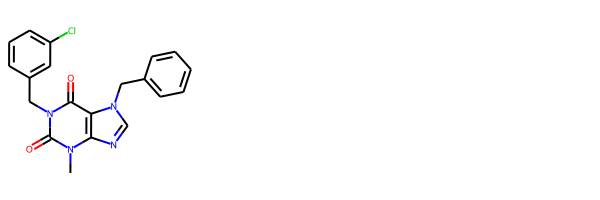

In [100]:
# Potential targets of compounds
CID_18 = 'C1=CC=C(C(=C1)C2=COC3=C(C2=O)C=CC(=C3)O)Cl'
CID_169 = 'CN1C2=C(C(=O)N(C1=O)CC3=CC(=CC=C3)Cl)N(C=N2)CC4=CC=CC=C4'
CID_189 = 'CSC1=C(C(=C(S1)C2=CC=NN2)C3=CC=CC=C3)C#N'
CID_190 = 'C[C@@H](c1ncncc1F)[C@](O)(CN2C=NC=N2)c3ccc(F)cc3F'

target_per_compound = gdi.loc[gdi['smiles'] == CID_18]
List_of_target_per_compound = target_per_compound['orf'].tolist()
print(List_of_target_per_compound)
print(len(List_of_target_per_compound))

ms_target = [Chem.MolFromSmiles(CID_169)]
Draw.MolsToGridImage(ms_target)

['C=CCSSCC=C', 'C1CCCCCNc2cc[n+](c3c2cccc3)Cc2ccc3c(c2)Cc2cc(C[n+]4ccc(NCCCC1)c1ccccc41)ccc32', 'Clc1ccccc1C(n1cncc1)(c1ccccc1)c1ccccc1', 'CCN(CCOC(=O)C(c1ccccc1)C1CCCCC1)CC.Cl', 'COc1cc(cc(c1OC)OC)C1C2C(=O)OCC2C(c2c1cc1OCOc1c2)O', 'COc1cc(cc(c1OC)OC)[C@H]1[C@H]2C(=O)OC[C@@H]2[C@H](c2c1cc1OCOc1c2)O', 'COc1cc(cc(c1OC)OC)[C@H]1[C@@H]2C(=O)OC[C@@H]2[C@H](c2c1cc1OCOc1c2)O', 'COc1cc(cc(c1OC)OC)[C@H]1[C@H]2C(=O)OC[C@@H]2[C@@H](c2c1cc1OCOc1c2)O', 'COc1cc(cc(c1OC)OC)[C@H]1[C@@H]2C(=O)OCC2[C@H](c2c1cc1OCOc1c2)O', 'COc1cc(cc(c1OC)OC)[C@@H]1[C@H]2C(=O)OC[C@@H]2[C@@H](c2c1cc1OCOc1c2)O', 'COc1cc(cc(c1OC)OC)[C@H]1[C@H]2C(=O)OCC2[C@H](c2c1cc1OCOc1c2)O', 'COc1cc(cc(c1OC)OC)[C@@H]1[C@@H]2C(=O)OC[C@@H]2[C@H](c2c1cc1OCOc1c2)O', 'COc1cc(cc(c1OC)OC)[C@H]1[C@@H]2C(=O)OC[C@@H]2[C@@H](c2c1cc1OCOc1c2)O', 'COc1cc2nc(nc(c2cc1OC)N)N1CCN(CC1)C(=O)c1ccco1', 'COc1cc2nc(nc(c2cc1OC)N)N1CCN(CC1)C(=O)c1ccco1.Cl', 'c1scc(n1)c1nc2c([nH]1)cccc2', 'c1csc(n1)c1nc2c([nH]1)cccc2', 'CN(C[C@@H](Cn1c2ccc(cc2c2c1ccc(c2)Br)Br)O)C',

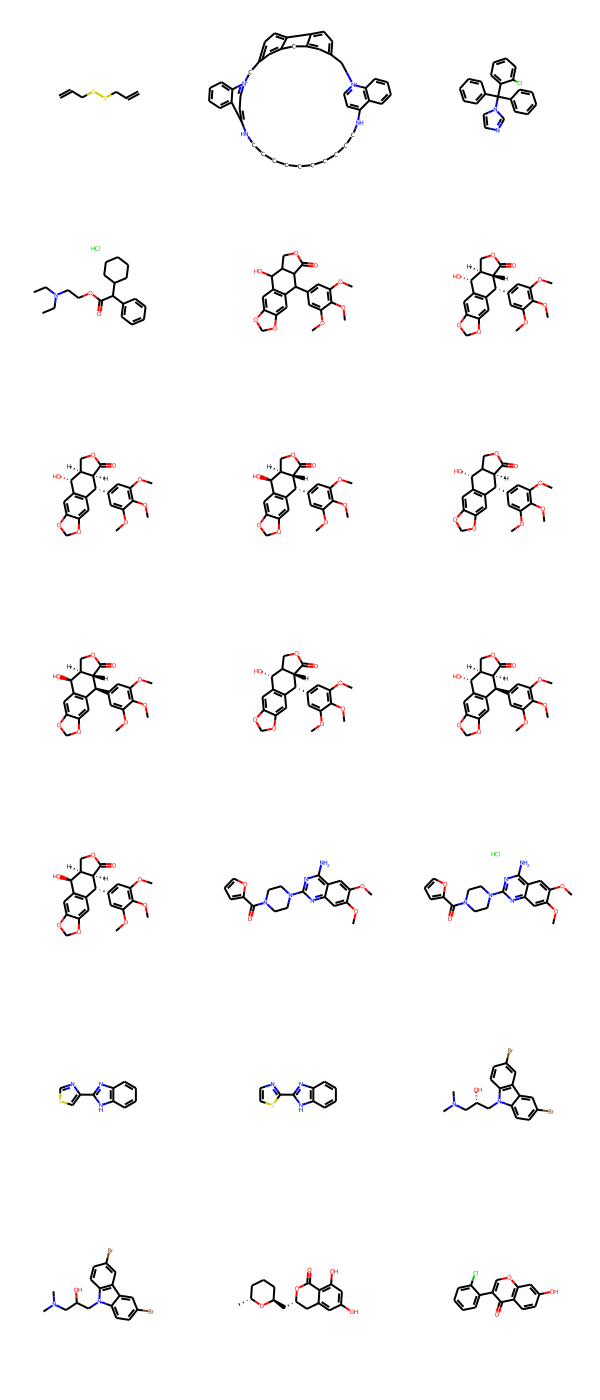

In [122]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# Other compounds for selected targets
CID_18_target = 'YDR037W'
CID_169_target = 'YBR002C'
CID_189_target = 'YML094W'
CID_190_target = 'YHR007C'

compounds_per_target = gdi.loc[gdi['orf'] == CID_18_target]
List_of_compounds_per_target = compounds_per_target['smiles'].unique().tolist()
print(List_of_compounds_per_target)
print(len(List_of_compounds_per_target))

#for i in len(List_of_compounds_per_target):
#    mol = Chem.MolFromSmiles(List_of_compounds_per_target[i])


compounds_per_target_file = compounds_per_target['smiles']
compounds_per_target_file = compounds_per_target_file.drop_duplicates()
compounds_per_target_file.to_csv('compounds_for_CID_18_target_file.csv')


ms = [Chem.MolFromSmiles(x) for x in List_of_compounds_per_target]
Draw.MolsToGridImage(ms)

In [121]:
compounds_per_target_file

234090                                           C=CCSSCC=C
234091    C1CCCCCNc2cc[n+](c3c2cccc3)Cc2ccc3c(c2)Cc2cc(C...
234092               Clc1ccccc1C(n1cncc1)(c1ccccc1)c1ccccc1
234093                CCN(CCOC(=O)C(c1ccccc1)C1CCCCC1)CC.Cl
234096    COc1cc(cc(c1OC)OC)C1C2C(=O)OCC2C(c2c1cc1OCOc1c2)O
234097    COc1cc(cc(c1OC)OC)[C@H]1[C@H]2C(=O)OC[C@@H]2[C...
234098    COc1cc(cc(c1OC)OC)[C@H]1[C@@H]2C(=O)OC[C@@H]2[...
234099    COc1cc(cc(c1OC)OC)[C@H]1[C@H]2C(=O)OC[C@@H]2[C...
234100    COc1cc(cc(c1OC)OC)[C@H]1[C@@H]2C(=O)OCC2[C@H](...
234101    COc1cc(cc(c1OC)OC)[C@@H]1[C@H]2C(=O)OC[C@@H]2[...
234102    COc1cc(cc(c1OC)OC)[C@H]1[C@H]2C(=O)OCC2[C@H](c...
234103    COc1cc(cc(c1OC)OC)[C@@H]1[C@@H]2C(=O)OC[C@@H]2...
234104    COc1cc(cc(c1OC)OC)[C@H]1[C@@H]2C(=O)OC[C@@H]2[...
234105        COc1cc2nc(nc(c2cc1OC)N)N1CCN(CC1)C(=O)c1ccco1
234106     COc1cc2nc(nc(c2cc1OC)N)N1CCN(CC1)C(=O)c1ccco1.Cl
234107                          c1scc(n1)c1nc2c([nH]1)cccc2
234108                          c1csc(n1

# SEC14

In [56]:
filtro_SEC14 = pandas.read_csv('GDI_SEC14.tsv',sep='\t')
filtro_SEC14_inchikey = pipeline_functions.smiles_to_inchikey(filtro_SEC14,'smiles')

In [57]:
#Datos para genes
filtro_genes_1 = pipeline_functions.leer_tabla_columnas("yeast.genes.list",'\t',['species_code', 'gene_name', 'omcl'])
filtro_genes_2 = pipeline_functions.leer_tabla_columnas("tryp.genes.list",'\t',['species_code', 'gene_name', 'omcl'])
filtro_genes_3 = pipeline_functions.leer_tabla_columnas('tbr.essentialOrthologs.list',',')

In [58]:
resultado_filtro_genes_1 = pipeline_functions.interseccion_datos(filtro_SEC14_inchikey,filtro_genes_1,'gene_name','gene_name',"OMCL in Yeast",'gene_name')
resultado_genes_1 = resultado_filtro_genes_1[0]
#resultado_genes_1 = resultado_genes_1[['gene_name','omcl','inchiKey']]
#resultado_genes_1 = resultado_genes_1.drop_duplicates()
#resultado_genes_1 = resultado_genes_1.dropna()

In [59]:
resultado_filtro_genes_2 = pipeline_functions.interseccion_datos(resultado_genes_1 ,filtro_genes_2,'gene_name','gene_name',"OMCL in Tryps", "gene_name")
resultado_genes_2 = resultado_filtro_genes_2[0]
#resultado_genes_2 = resultado_genes_2[['gene_name_y','omcl','inchiKey']]
#resultado_genes_2 = resultado_genes_2.drop_duplicates()
#resultado_genes_2 = resultado_genes_2.dropna()

In [60]:
resultado_filtro_genes_3 = pipeline_functions.interseccion_datos(resultado_genes_2,filtro_genes_3,'omcl','omcl',"Essentiality", "omcl")
resultado_genes_3 = resultado_filtro_genes_2[0]

KeyError: 'omcl'

In [ ]:
#Datos para compuestos
filtro_compuestos_1 = pipeline_functions.leer_tabla_columnas('tested_drugs_inchikey.csv',',')
filtro_compuestos_2 = pipeline_functions.leer_tabla_columnas('drug_availability_inchikey.csv',',')

In [ ]:
resultado_filtro_compuestos_1 = pipeline_functions.interseccion_datos(filtro_SEC14_inchikey,filtro_compuestos_2,'inchiKey','inchikey','Disponibilidad comercial','inchiKey')
resultado_compuestos_1 = resultado_filtro_compuestos_1[0]
resultado_compuestos_1 = resultado_compuestos_1[['gene_name','inchiKey','smiles_x']]
resultado_compuestos_1 = resultado_compuestos_1.drop_duplicates()
resultado_compuestos_1 = resultado_compuestos_1.dropna()

In [ ]:
resultado_filtro_compuestos_2 = pipeline_functions.drug_likness(resultado_compuestos_1,'smiles_x')
resultado_compuestos_2 = resultado_filtro_compuestos_2[0]
#resultado_compuestos_2 = resultado_compuestos_2[['orf','inchiKey','smiles']]
#resultado_compuestos_2 = resultado_compuestos_2.drop_duplicates()
#resultado_compuestos_2 = resultado_compuestos_2.dropna()